## Visualizing Tech Stocks

In this project you will analyze and visualize the top 5 highest valued technology stocks, as of the end of the first half of 2019:
* Microsoft (NASDAQ:MSFT)
* Amazon (NASDAQ:AMZN)
* Apple (NASDAQ:AAPL)
* Alphabet (NASDAQ:GOOG)
* Facebook (NASDAQ:FB).

Using Pandas, Pandas-Datarader, and Matplotlib, you will take a visual look into the similarities and differences between these stocks during the six month period from January through June 2019. In your analysis you will perform the following:
1. Visualize the stock prices using matplotlib
2. Calculate and visualize the daily simple rate of return 
3. Calculate and visualize the mean rates of return
4. Calculate and visualize the variances of the returns
5. Calculate and visualize the standard deviations of the returns
6. Write a short thesis based on the correlations between the tech stocks

### 1. Import Packages

#### Step 1: Import Data Manipulation Packages
Import the pandas and numpy module as `pd` and `np`, respectively

In [141]:
import pandas as pd
import numpy as np

#### Step 2: Import Financial Package
Import the pandas data reader module as `web`. (Ensure the module is installed with `pip install pandas-datareader` on the command line)

In [142]:
import pandas_datareader as web

#### Step 3: Import Visualization Package
Import the matplotlib `pyplot` module as `plt`. (Write `%matplotlib inline` below the import statement to allow your visualizations to appear beneath the code that generates them)

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load the adjusted closings for the top 5 tech stocks.

#### Step 1: Define Stocks
Create a list named `symbols` containing the symbols for the top 5 tech stocks.
#### Step 2: Create Dates
Create a datetime object representing January 1st, 2019 named `start_date` and a datetime object representing July 1st, 2019 named `end_date`.
#### Step 3: Retrieve Data
Call the function `web.get_data_yahoo()` with arguments `symbols`, `start_date` and `end_date` and save the result to `stock_data`.
#### Step 4: View Data
View both `stock_data` and `stock_data['Adj Close']`. What information is stored in these DataFrames?

In [144]:
symbols = ["MSFT", "AMZN", "AAPL", "GOOG", "META", "NFLX"]
start_date = "2022-01-01"
end_date = "2022-07-01"
stock_data = web.get_data_yahoo(symbols, start_date, end_date)
stock_data

Attributes   Adj Close                                                  \
Symbols           MSFT        AMZN        AAPL        GOOG        META   
Date                                                                     
2022-01-03  333.283020  170.404495  181.259933  145.074493  338.540009   
2022-01-04  327.568176  167.522003  178.959457  144.416504  336.529999   
2022-01-05  314.993530  164.356995  174.199142  137.653503  324.170013   
2022-01-06  312.504486  163.253998  171.291183  137.550995  332.459991   
2022-01-07  312.663788  162.554001  171.460495  137.004501  331.790009   
...                ...         ...         ...         ...         ...   
2022-06-27  264.890015  113.220001  141.463501  116.622498  169.490005   
2022-06-28  256.480011  107.400002  137.249359  112.571503  160.679993   
2022-06-29  260.260010  108.919998  139.036865  112.256500  163.940002   
2022-06-30  256.829987  106.209999  136.530350  109.372498  161.250000   
2022-07-01  259.579987  109.559998  138.737274  109.081001  160.029999   

Attributes                   Close                                      ...  \
Symbols           NFLX        MSFT        AMZN        AAPL        GOOG  ...   
Date                                                                    ...   
2022-01-03  597.369995  334.750000  170.404495  182.009995  145.074493  ...   
2022-01-04  591.150024  329.010010  167.522003  179.699997  144.416504  ...   
2022-01-05  567.520020  316.380005  164.356995  174.919998  137.653503  ...   
2022-01-06  553.289978  313.880005  163.253998  172.000000  137.550995  ...   
2022-01-07  541.059998  314.040009  162.554001  172.169998  137.004501  ...   
...                ...         ...         ...         ...         ...  ...   
2022-06-27  189.139999  264.890015  113.220001  141.660004  116.622498  ...   
2022-06-28  179.600006  256.480011  107.400002  137.440002  112.571503  ...   
2022-06-29  178.360001  260.260010  108.919998  139.229996  112.256500  ...   
2022-06-30  174.869995  256.829987  106.209999  136.720001  109.372498  ...   
2022-07-01  179.949997  259.579987  109.559998  138.929993  109.081001  ...   

Attributes        Open                                          Volume  \
Symbols           AAPL        GOOG        META        NFLX        MSFT   
Date                                                                     
2022-01-03  177.830002  144.475494  338.299988  605.609985  28865100.0   
2022-01-04  182.630005  145.550507  339.950012  599.909973  32674300.0   
2022-01-05  179.610001  144.181000  333.019989  592.000000  40054300.0   
2022-01-06  172.699997  137.497498  322.820007  554.340027  39646100.0   
2022-01-07  172.889999  137.904999  332.739990  549.460022  32720000.0   
...                ...         ...         ...         ...         ...   
2022-06-27  142.699997  118.934998  171.320007  191.770004  24615100.0   
2022-06-28  142.130005  116.350998  169.899994  189.199997  27295500.0   
2022-06-29  137.460007  112.148499  163.570007  179.550003  20069800.0   
2022-06-30  137.250000  110.499496  162.149994  177.070007  31730900.0   
2022-07-01  136.039993  108.336998  160.309998  176.490005  22837700.0   

Attributes                                                              
Symbols           AMZN         AAPL        GOOG        META       NFLX  
Date                                                                    
2022-01-03  63520000.0  104487900.0  25214000.0  14537900.0  3067500.0  
2022-01-04  70726000.0   99310400.0  22928000.0  15998000.0  4393100.0  
2022-01-05  64302000.0   94537600.0  49642000.0  20564500.0  4148700.0  
2022-01-06  51958000.0   96904000.0  29050000.0  27962800.0  5711800.0  
2022-01-07  46606000.0   86709100.0  19408000.0  14722000.0  3382900.0  
...                ...          ...         ...         ...        ...  
2022-06-27  62133200.0   70207900.0  32840000.0  29174600.0  8363900.0  
2022-06-28  74942900.0   67083400.0  28232000.0  27744500.0  7185400.0  
2022-06-29  6637

In [145]:
stock_data['Adj Close']

Symbols,MSFT,AMZN,AAPL,GOOG,META,NFLX
Date,,,,,,
2022-01-03,333.283020,170.404495,181.259933,145.074493,338.540009,597.369995
2022-01-04,327.568176,167.522003,178.959457,144.416504,336.529999,591.150024
2022-01-05,314.993530,164.356995,174.199142,137.653503,324.170013,567.520020
2022-01-06,312.504486,163.253998,171.291183,137.550995,332.459991,553.289978
2022-01-07,312.663788,162.554001,171.460495,137.004501,331.790009,541.059998
...,...,...,...,...,...,...
2022-06-27,264.890015,113.220001,141.463501,116.622498,169.490005,189.139999
2022-06-28,256.480011,107.400002,137.249359,112.571503,160.679993,179.600006
2022-06-29,260.260010,108.919998,139.036865,112.256500,163.940002,178.360001


### 3. Plot the adjusted closing prices over time.

Create a plot with matplotlib that shows the adjusted closing prices of each stock over time. Set the x label to `"Date"`. Set the y label to `"Adjusted Closing Price Over Time"`. Set the graph title to `"Tech Stocks Adjusted Price"`.

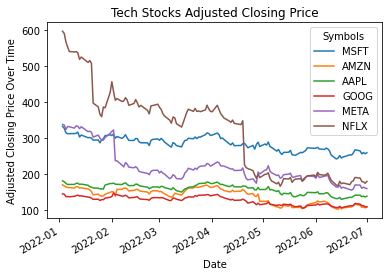

In [146]:
stock_data_close = stock_data['Adj Close']
stock_data_close.plot()
plt.title('Tech Stocks Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price Over Time')
plt.show()

### 4. Calculate and plot the daily simple rate of return over time.
Create a plot with matplotlib that shows the daily simple rate of return for each tech stock over time. Label the graph appropriately. 

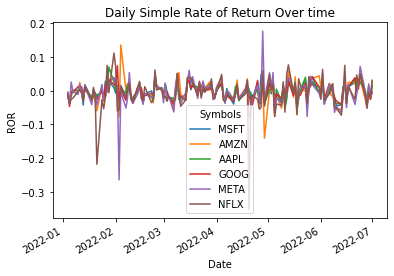

<Figure size 1152x648 with 0 Axes>

In [147]:
stock_data_daily_returns = stock_data['Adj Close'].pct_change()
stock_data_daily_returns.plot()
plt.xlabel("Date")
plt.ylabel("ROR")
plt.title("Daily Simple Rate of Return Over time")
plt.figure(figsize=(16,9))
plt.show()

### 5. Create subplots of daily simple rate of return.
In order to better visualize the daily returns, create a subplot for each tech stock. 

AttributeError: 'AxesSubplot' object has no attribute 'set_Title'

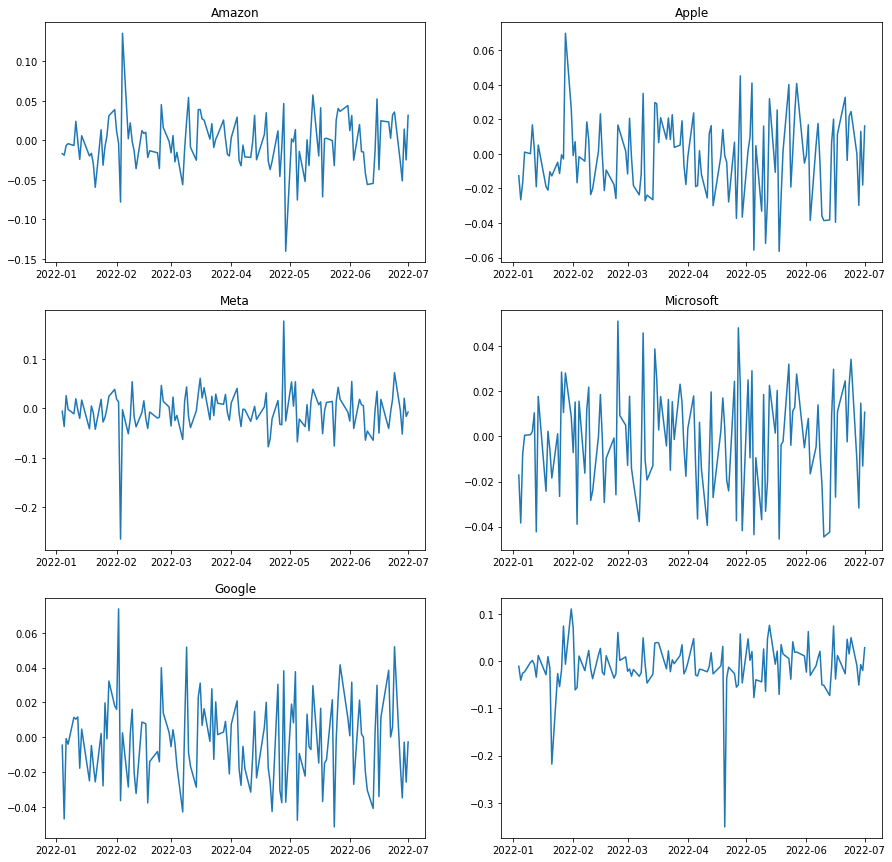

In [148]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)
ax1.plot(stock_data['Adj Close']['AMZN'].pct_change())
ax1.set_title("Amazon")
ax2.plot(stock_data['Adj Close']['AAPL'].pct_change())
ax2.set_title("Apple")
ax3.plot(stock_data['Adj Close']['META'].pct_change())
ax3.set_title("Meta")
ax4.plot(stock_data['Adj Close']['MSFT'].pct_change())
ax4.set_title("Microsoft")
ax5.plot(stock_data['Adj Close']['GOOG'].pct_change())
ax5.set_title("Google")
ax6.plot(stock_data['Adj Close']['NFLX'].pct_change())
ax6.set_Title("Netflix")
plt.tight_layout()
plt.show()

### 6. Calculate and plot the mean of each tech stock's daily simple rate of return

#### Step 1: Calculate mean rate of return
For each stock, calculate the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the mean daily simple rate of return for each stock. Label the chart appropriately
#### Step 3: Analyze mean rate of return
Based on the mean rate of return, which stock would be the best option to invest in?

In [ ]:
daily_mean = stock_data_daily_returns.mean()
daily_mean

In [ ]:
daily_mean.keys()

In [ ]:
height = []
for key in daily_mean.keys():
    height.append(daily_mean[key])
height

In [ ]:
x = np.arange(len(daily_mean.keys()))
x

In [ ]:
plt.bar(x, height)

plt.xticks(x, daily_mean.keys())
plt.title('Daily Mean ROR')
plt.xlabel('Tech Stocks')
plt.ylabel('Daily Mean')
plt.show()

Facebook has the highest mean simple rate of return over the period of data collected. Thus Facebook would have been a good choice for investment over this period of time. Google, on the other hand, has the lowest mean simple rate of return over the period.

### 7. Calculate and plot the variance.

#### Step 1: Calculate the variance
For each stock, calculate the variance of the mean daily simple rate of return.
#### Step 2: Plot bar chart
Use matplotlib to create a bar chart comparing the variance for each stock. Label the chart appropriately
#### Step 3: Analyse the variance
Based on the variance, which stock would be the riskiest to invest in?

In [ ]:
daily_variance = stock_data_daily_returns.var()
daily_variance

In [ ]:
daily_variance.keys()

In [ ]:
height = [daily_variance[key] for key in daily_variance.keys()]
height

In [ ]:
x = np.arange(len(daily_variance.keys()))
x

Facebook shows the highest variance of all the stocks, indicating it can be a riskier investment. Google shows the lowest variance, indicating that the returns are more predictable. This goes along with the typical understanding of higher return, high risks stocks, and lower return, low risk stocks.

In [ ]:
plt.bar(x, height)

plt.xticks(x, daily_variance.keys())

plt.title('Daily Variance')
plt.xlabel('Tech Stocks')
plt.ylabel('Variance')

plt.show()

### 8. Calculate and plot the standard deviation

#### Step 1: Calculate the standard deviation
For each stock, calculate the standard deviation of the mean daily simple rate of return.

#### Step 2: Plot the bar chart
Use matplotlib to create a bar chart comparing the standard deviation of the mean daily simple rate of return of each stock. Label the chart appropriately

#### Step 3: Analyze the standard deviation
Based on the standard deviation of the rates of return, which stock would you choose to invest in and why?

In [ ]:
daily_std = stock_data_daily_returns.std()
daily_std

In [ ]:
daily_variance.keys()

In [ ]:
height = [daily_std[key] for key in daily_std.keys()]
height

In [ ]:
x = np.arange(len(daily_std.keys()))
x

In [ ]:
plt.bar(x, height)

plt.xticks(x, daily_std.keys())

plt.title('Daily Standard Deviation')
plt.xlabel('Tech Stocks')
plt.ylabel('Standard Deviation')

plt.show()

The answer to this question depends on your investment preferences. Facebook is the most volatile stock, as it has the largest standard deviation. It also, however, has the largest mean return. If you are a more risky investor, this could be your stock of choice. Google, on the other hand, is the least volatile stock, but has the lowest mean return.

### 9. Calculate the correlations
Calculate the correlations between each of the stocks. Which stocks are positively correlated? Which are negatively correlated? Which have little correlation?

In [149]:
stock_data_daily_returns.corr()


Symbols,MSFT,AMZN,AAPL,GOOG,META,NFLX
Symbols,,,,,,
MSFT,1.000000,0.730538,0.838292,0.799962,0.637945,0.464024
AMZN,0.730538,1.000000,0.694367,0.707870,0.628862,0.577533
AAPL,0.838292,0.694367,1.000000,0.799650,0.615429,0.461227
GOOG,0.799962,0.707870,0.799650,1.000000,0.701772,0.506513
META,0.637945,0.628862,0.615429,0.701772,1.000000,0.593017
NFLX,0.464024,0.577533,0.461227,0.506513,0.593017,1.000000


None of the stocks are negatively correlated. Microsoft and Google are highly correlated, while Facebook and Apple exhibit the lowest correlation.